In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Q1: 1.	Exam Scores are normally distributed with a mean of 75 and a standard deviation of 8. 
a.	What is the probability of getting less than 70%?
b.	What is the probability of getting more than 90%?
c.	What is the probability of getting between 70% and 80%? 


In [2]:
import scipy.stats as stats

# Given information
mean = 75
std_dev = 8

# a) Probability of getting less than 70%
z_score_a = (70 - mean) / std_dev
prob_a = stats.norm.cdf(z_score_a)
print(f"a) Probability of getting less than 70%: {prob_a:.4f}")

# b) Probability of getting more than 90%
z_score_b = (90 - mean) / std_dev
prob_b = 1 - stats.norm.cdf(z_score_b)
print(f"b) Probability of getting more than 90%: {prob_b:.4f}")

# c) Probability of getting between 70% and 80%
z_score_c1 = (70 - mean) / std_dev
z_score_c2 = (80 - mean) / std_dev
prob_c = stats.norm.cdf(z_score_c2) - stats.norm.cdf(z_score_c1)
print(f"c) Probability of getting between 70% and 80%: {prob_c:.4f}")

a) Probability of getting less than 70%: 0.2660
b) Probability of getting more than 90%: 0.0304
c) Probability of getting between 70% and 80%: 0.4680


# 2.	The time between lightning strikes is exponentially distributed with an average time between occurrences of 2 days.
a.	What is the probability of lightning occurring within one day of a prior strike? 
b.	What is the probability of lightning occurring within three days of a prior strike?
c.	What is the probability of lightning occurring more than five days after a strike?


In [3]:
import scipy.stats as stats
import math

# Given information
avg_time = 2  # Average time between occurrences (in days)
rate = 1 / avg_time  # Rate parameter (λ)

# a) Probability of lightning occurring within one day
time_a = 1
prob_a = 1 - math.exp(-rate * time_a)
print(f"a) Probability of lightning occurring within one day: {prob_a:.4f}")

# b) Probability of lightning occurring within three days
time_b = 3
prob_b = 1 - math.exp(-rate * time_b)
print(f"b) Probability of lightning occurring within three days: {prob_b:.4f}")

# c) Probability of lightning occurring more than five days after a strike
time_c = 5
prob_c = math.exp(-rate * time_c)
print(f"c) Probability of lightning occurring more than five days after a strike: {prob_c:.4f}")

a) Probability of lightning occurring within one day: 0.3935
b) Probability of lightning occurring within three days: 0.7769
c) Probability of lightning occurring more than five days after a strike: 0.0821


# 3.	The speed you are driving is uniformly distributed between 40 and 60 on a city road. 
a.	What is the probability you are driving faster than 45?
b.	If you go faster than 55, your probability of getting a ticket is 30%. The ticket fee is uniformly distributed between $100 and $300. If you are driving normally on the road, what is the probability you will pay more than $250 for a ticket?


In [4]:
# a) Probability of driving faster than 45 mph
min_speed = 40
max_speed = 60
speed_threshold = 45

prob_a = (max_speed - speed_threshold) / (max_speed - min_speed)
print(f"a) Probability of driving faster than 45 mph: {prob_a:.4f}")

# b) Probability of driving normally and paying more than $250 for a ticket
min_fee = 100
max_fee = 300
fee_threshold = 250
prob_speeding = (max_speed - 55) / (max_speed - min_speed)
prob_ticket_if_speeding = 0.3
prob_speeding_and_ticket = prob_speeding * prob_ticket_if_speeding
prob_fee_gt_250 = (max_fee - fee_threshold) / (max_fee - min_fee)
prob_b = prob_speeding_and_ticket * prob_fee_gt_250
print(f"b) Probability of driving normally and paying more than $250 for a ticket: {prob_b:.4f}")

a) Probability of driving faster than 45 mph: 0.7500
b) Probability of driving normally and paying more than $250 for a ticket: 0.0187


# 4.	What is the correlation between A and B? What is the correlation between A and C? What is the correlation between B and C? Which data sets are most positively correlated?


In [5]:
import numpy as np
from scipy.stats import pearsonr

# Data
A = np.array([91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5])
B = np.array([95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2])
C = np.array([93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45])

# Pearson Correlation Coefficient
corr_AB, _ = pearsonr(A, B)
corr_AC, _ = pearsonr(A, C)
corr_BC, _ = pearsonr(B, C)

print(f"Correlation between A and B: {corr_AB:.6f}")
print(f"Correlation between A and C: {corr_AC:.6f}")
print(f"Correlation between B and C: {corr_BC:.6f}")

# Principal Component Analysis (PCA)
data = np.column_stack((A, B, C))
means = np.mean(data, axis=0)
data_centered = data - means

cov_matrix = np.cov(data_centered.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print("\nPrincipal Component Analysis (PCA):")
print("Eigenvalues:")
print(eig_values)
print("\nEigenvectors (Principal Components):")
print(eig_vectors)

Correlation between A and B: 0.997372
Correlation between A and C: 0.419590
Correlation between B and C: 0.416567

Principal Component Analysis (PCA):
Eigenvalues:
[2633.82308556    3.17058174  673.64918985]

Eigenvectors (Principal Components):
[[-0.65441548 -0.72101583 -0.22776426]
 [-0.67948527  0.69291176 -0.2411909 ]
 [-0.33172299  0.00307659  0.94337182]]


Correlation between A and B: 0.997372
Correlation between A and C: 0.419590
Correlation between B and C: 0.416567


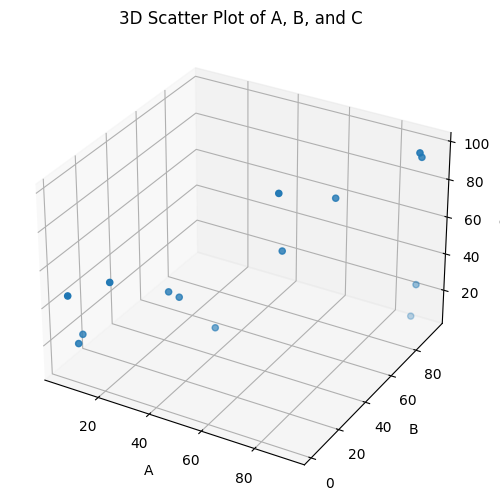


Principal Component Analysis (PCA):
Eigenvalues:
[2633.82308556    3.17058174  673.64918985]

Eigenvectors (Principal Components):
[[-0.65441548 -0.72101583 -0.22776426]
 [-0.67948527  0.69291176 -0.2411909 ]
 [-0.33172299  0.00307659  0.94337182]]


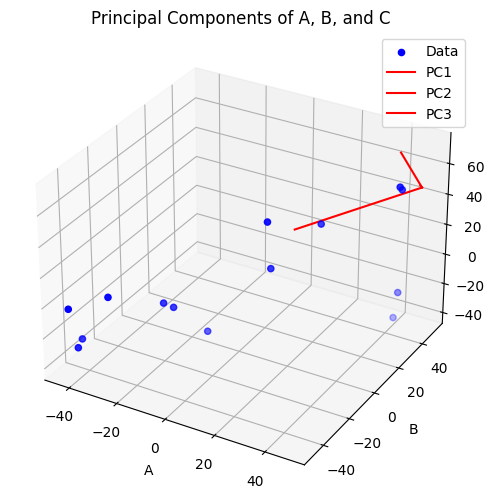

In [6]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
A = np.array([91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5])
B = np.array([95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2])
C = np.array([93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45])

# Pearson Correlation Coefficient
corr_AB, _ = pearsonr(A, B)
corr_AC, _ = pearsonr(A, C)
corr_BC, _ = pearsonr(B, C)

print(f"Correlation between A and B: {corr_AB:.6f}")
print(f"Correlation between A and C: {corr_AC:.6f}")
print(f"Correlation between B and C: {corr_BC:.6f}")

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A, B, C)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_title('3D Scatter Plot of A, B, and C')
plt.show()

# Principal Component Analysis (PCA)
data = np.column_stack((A, B, C))
means = np.mean(data, axis=0)
data_centered = data - means

cov_matrix = np.cov(data_centered.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print("\nPrincipal Component Analysis (PCA):")
print("Eigenvalues:")
print(eig_values)
print("\nEigenvectors (Principal Components):")
print(eig_vectors)

# 3D plot with principal components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_centered[:, 0], data_centered[:, 1], data_centered[:, 2], c='b', marker='o', label='Data')

for i, eigvec in enumerate(eig_vectors.T):
    ax.plot([means[0], means[0] + eigvec[0]*np.sqrt(eig_values[i])],
            [means[1], means[1] + eigvec[1]*np.sqrt(eig_values[i])],
            [means[2], means[2] + eigvec[2]*np.sqrt(eig_values[i])], c='r', label=f'PC{i+1}')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_title('Principal Components of A, B, and C')
ax.legend()
plt.show()


Principal Component Analysis (PCA):
Eigenvalues:
[2633.82308556    3.17058174  673.64918985]

Eigenvectors (Principal Components):
[[-0.65441548 -0.72101583 -0.22776426]
 [-0.67948527  0.69291176 -0.2411909 ]
 [-0.33172299  0.00307659  0.94337182]]


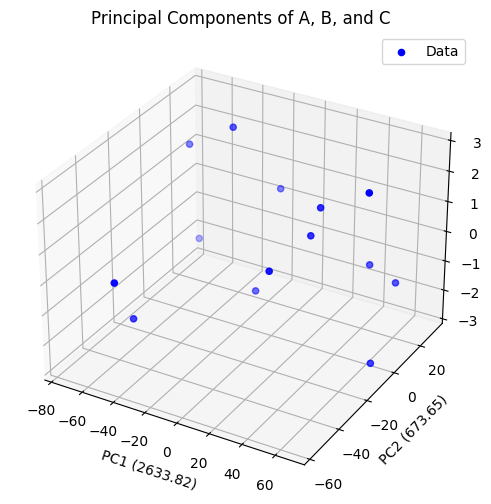

In [7]:


# Principal Component Analysis (PCA)
data = np.column_stack((A, B, C))
means = np.mean(data, axis=0)
data_centered = data - means

cov_matrix = np.cov(data_centered.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print("\nPrincipal Component Analysis (PCA):")
print("Eigenvalues:")
print(eig_values)
print("\nEigenvectors (Principal Components):")
print(eig_vectors)

# Sort eigenvectors based on eigenvalues in descending order
sorted_indices = np.argsort(eig_values)[::-1]
eig_values_sorted = eig_values[sorted_indices]
eig_vectors_sorted = eig_vectors[:, sorted_indices]

# 3D plot with principal components as axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Project data onto principal components
projected_data = data_centered @ eig_vectors_sorted

ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c='b', marker='o', label='Data')

# Set axes to eigenvectors with highest eigenvalues
ax.set_xlabel(f'PC1 ({eig_values_sorted[0]:.2f})')
ax.set_ylabel(f'PC2 ({eig_values_sorted[1]:.2f})')
ax.set_zlabel(f'PC3 ({eig_values_sorted[2]:.2f})')

ax.set_title('Principal Components of A, B, and C')
ax.legend()
plt.show()

In [8]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
A = np.array([91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5])
B = np.array([95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2])
C = np.array([93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45])


## Python Function ##
from numpy import array, random, arange

def xicor(X, Y, ties=True):
    random.seed(42)
    n = len(X)
    order = array([i[0] for i in sorted(enumerate(X), key=lambda x: x[1])])
    if ties:
        l = array([sum(y >= Y[order]) for y in Y[order]])
        r = l.copy()
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = array([r[j] == r[i] for i in range(n)])
                r[tie_index] = random.choice(r[tie_index] - arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        return 1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l)))
    else:
        r = array([sum(y >= Y[order]) for y in Y[order]])
        return 1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1)
    
    
# Pearson Correlation Coefficient
corr_AB, _ = pearsonr(A, B)
corr_AC, _ = pearsonr(A, C)
corr_BC, _ = pearsonr(B, C)

print(f"Correlation between A and B: {corr_AB:.6f}")
print(f"Correlation between A and C: {corr_AC:.6f}")
print(f"Correlation between B and C: {corr_BC:.6f}")

# Psi Correlation Coefficient
xi_corr_AB = xicor(A, B)
xi_corr_AC = xicor(A, C)
xi_corr_BC = xicor(B, C)

print(f"Xi Correlation between A and B: {xi_corr_AB:.6f}")
print(f"Xi Correlation between A and C: {xi_corr_AC:.6f}")
print(f"Xi Correlation between B and C: {xi_corr_BC:.6f}")

Correlation between A and B: 0.997372
Correlation between A and C: 0.419590
Correlation between B and C: 0.416567
Xi Correlation between A and B: 0.676923
Xi Correlation between A and C: 0.045455
Xi Correlation between B and C: 0.136364


Correlation between A and B: 0.997372
Correlation between A and C: 0.419590
Correlation between B and C: 0.416567
Xi Correlation between A and B: 0.676923
Xi Correlation between A and C: 0.045455
Xi Correlation between B and C: 0.136364


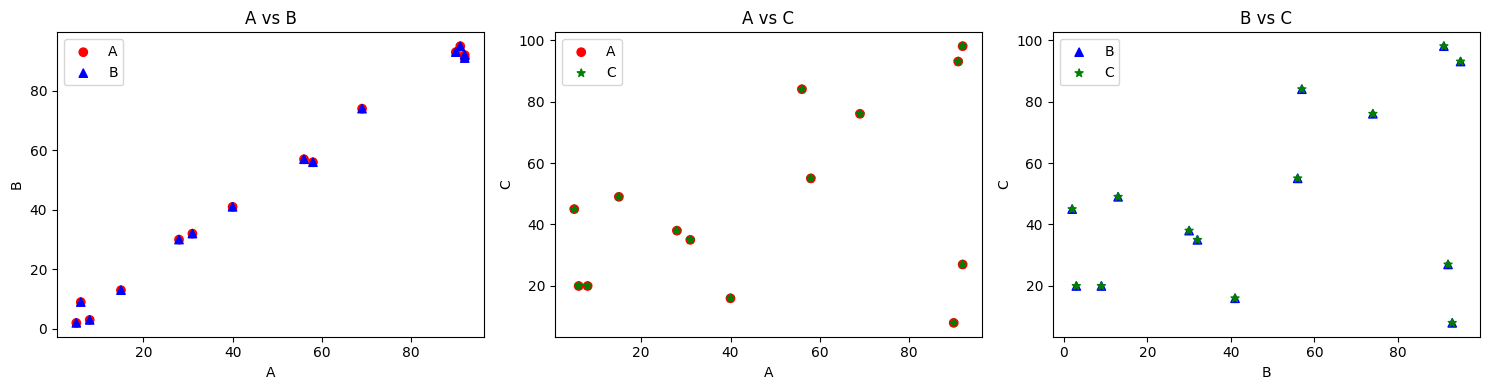


Principal Component Analysis (PCA):
Eigenvalues:
[2633.82308556    3.17058174  673.64918985]

Eigenvectors (Principal Components):
[[-0.65441548 -0.72101583 -0.22776426]
 [-0.67948527  0.69291176 -0.2411909 ]
 [-0.33172299  0.00307659  0.94337182]]


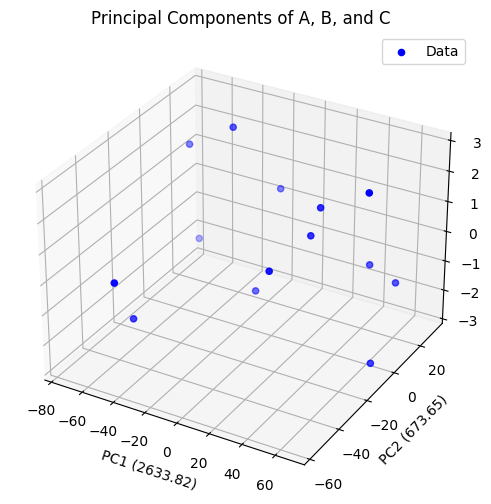

In [9]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
A = np.array([91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5])
B = np.array([95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2])
C = np.array([93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45])

# Pearson Correlation Coefficient
corr_AB, _ = pearsonr(A, B)
corr_AC, _ = pearsonr(A, C)
corr_BC, _ = pearsonr(B, C)

# Xi Correlation Coefficient
xi_corr_AB = xicor(A, B)
xi_corr_AC = xicor(A, C)
xi_corr_BC = xicor(B, C)

print(f"Correlation between A and B: {corr_AB:.6f}")
print(f"Correlation between A and C: {corr_AC:.6f}")
print(f"Correlation between B and C: {corr_BC:.6f}")

print(f"Xi Correlation between A and B: {xi_corr_AB:.6f}")
print(f"Xi Correlation between A and C: {xi_corr_AC:.6f}")
print(f"Xi Correlation between B and C: {xi_corr_BC:.6f}")

## Python Function ##
from numpy import array, random, arange

def xicor(X, Y, ties=True):
    random.seed(42)
    n = len(X)
    order = array([i[0] for i in sorted(enumerate(X), key=lambda x: x[1])])
    if ties:
        l = array([sum(y >= Y[order]) for y in Y[order]])
        r = l.copy()
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = array([r[j] == r[i] for i in range(n)])
                r[tie_index] = random.choice(r[tie_index] - arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        return 1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l)))
    else:
        r = array([sum(y >= Y[order]) for y in Y[order]])
        return 1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1)


# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(A, B, c=['r']*len(A), label='A', marker='o')
axes[0].scatter(A, B, c=['b']*len(B), label='B', marker='^')
axes[0].set_title("A vs B")
axes[0].set_xlabel("A")
axes[0].set_ylabel("B")
axes[0].legend()

axes[1].scatter(A, C, c=['r']*len(A), label='A', marker='o')
axes[1].scatter(A, C, c=['g']*len(C), label='C', marker='*')
axes[1].set_title("A vs C")
axes[1].set_xlabel("A")
axes[1].set_ylabel("C")
axes[1].legend()

axes[2].scatter(B, C, c=['b']*len(B), label='B', marker='^')
axes[2].scatter(B, C, c=['g']*len(C), label='C', marker='*')
axes[2].set_title("B vs C")
axes[2].set_xlabel("B")
axes[2].set_ylabel("C")
axes[2].legend()

plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)
data = np.column_stack((A, B, C))
means = np.mean(data, axis=0)
data_centered = data - means

cov_matrix = np.cov(data_centered.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print("\nPrincipal Component Analysis (PCA):")
print("Eigenvalues:")
print(eig_values)
print("\nEigenvectors (Principal Components):")
print(eig_vectors)

# Sort eigenvectors based on eigenvalues in descending order
sorted_indices = np.argsort(eig_values)[::-1]
eig_values_sorted = eig_values[sorted_indices]
eig_vectors_sorted = eig_vectors[:, sorted_indices]

# 3D plot with principal components as axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Project data onto principal components
projected_data = data_centered @ eig_vectors_sorted

ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c='b', marker='o', label='Data')

# Set axes to eigenvectors with highest eigenvalues
ax.set_xlabel(f'PC1 ({eig_values_sorted[0]:.2f})')
ax.set_ylabel(f'PC2 ({eig_values_sorted[1]:.2f})')
ax.set_zlabel(f'PC3 ({eig_values_sorted[2]:.2f})')

ax.set_title('Principal Components of A, B, and C')
ax.legend()
plt.show()

/tmp/ipykernel_18/3735957568.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Imported the required packages and defined the colour scheme
Sample Correlation: 41.7%
Sample Expected Value: (49.14,47.43)
Sample Variance: 5,583,158.95


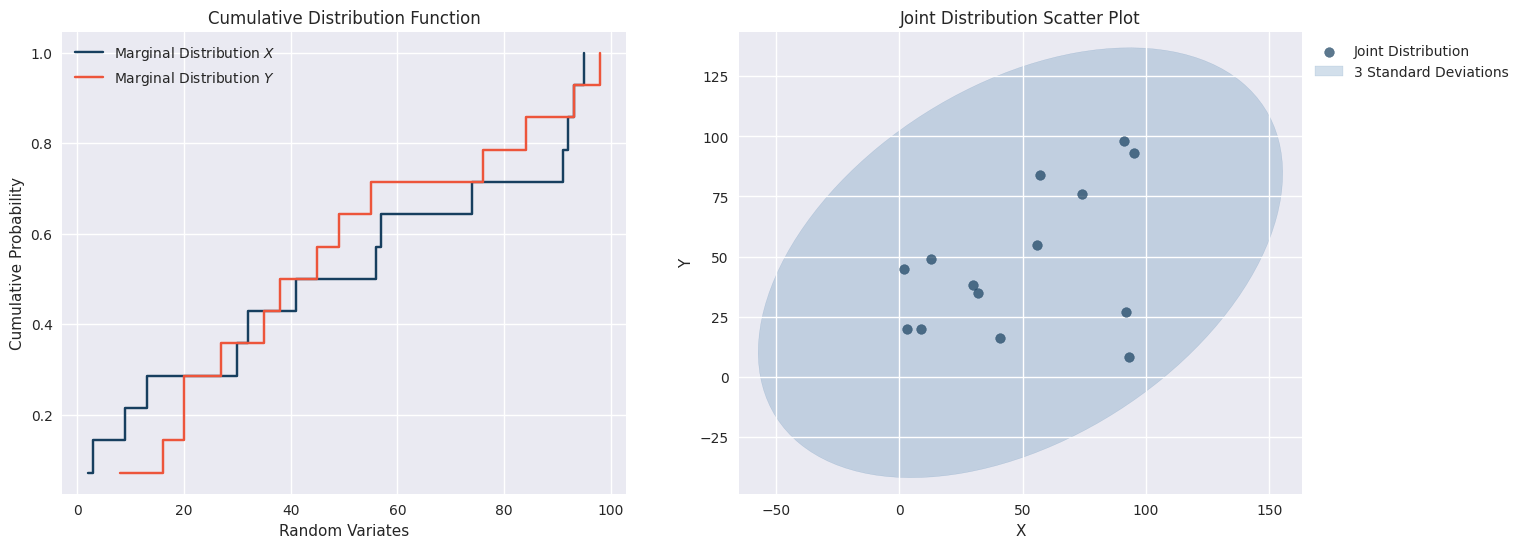

In [10]:
# Import the required packages
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.style.use('seaborn')
sns.set_style("darkgrid")

# Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

print("Imported the required packages and defined the colour scheme")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

n = 1000

X = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=123)
Y = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=321)


# Data
A = np.array([91, 69, 8, 15, 58, 28, 90, 92, 92, 6, 56, 31, 40, 5])
B = np.array([95, 74, 3, 13, 56, 30, 93, 91, 92, 9, 57, 32, 41, 2])
C = np.array([93, 76, 20, 49, 55, 38, 8, 98, 27, 20, 84, 35, 16, 45])

X = B
Y = C

n = np.size(X)


### Emperical CDF
cdf_y = np.arange(1, n+1) / n
X_cdf_x = np.sort(X)
Y_cdf_x = np.sort(Y)

### Correlation
correlation_sample = np.corrcoef(X, Y)
print("Sample Correlation: {:.1%}".format(correlation_sample[1,0]))

### Expected Value
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X2 = np.square(X)
Y2 = np.square(Y)

### Variance
var = (np.mean(X2)*np.mean(Y2)) - ((np.mean(X)**2)*(np.mean(Y)**2))

print("Sample Expected Value: ({:,.2f},{:,.2f})".format(X_mean, Y_mean))
print("Sample Variance: {:,.2f}".format(var))

### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(X_cdf_x, cdf_y, where='post', color=c1, label=r"Marginal Distribution $X$")
ax[0].step(Y_cdf_x, cdf_y, where='post', color=c5, label=r"Marginal Distribution $Y$")
ax[0].set(title="Cumulative Distribution Function", xlabel="Random Variates", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].scatter(X, Y, color=c1, alpha=0.7, label="Joint Distribution")
confidence_ellipse(X, Y, ax=ax[1],alpha=0.2, facecolor=c2, edgecolor=c2, zorder=0, label="3 Standard Deviations",)
ax[1].set(title="Joint Distribution Scatter Plot", xlabel="X", ylabel="Y")
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()


In [11]:
X

array([95, 74,  3, 13, 56, 30, 93, 91, 92,  9, 57, 32, 41,  2])

In [12]:
np.size(X)

14